# Derivation of Bernoulli's Equations


## Learning outcomes

* Learn how Bernoulli's equations are derived.
* Work in curvilinear coordinates
* Learn about some applications of Bernoulli's equations.

## Recap of Vector fields

As we saw in the previous notebook, the velocity of a fluid flow at each point in an Eulerian sense can be represented by a vector field $\vec{V}(\vec{x},t)$ where the position vector $\vec{x}$ denotes the position of each velocity vector relative to the origin, $\vec{x}(x,y,z) = x\mathbf{\hat{i}}+y\mathbf{\hat{j}}+z\mathbf{\hat{k}}$ where $\mathbf{\hat{i}}$, $\mathbf{\hat{j}}$ and $\mathbf{\hat{k}}$ are unit basis vectors, and the current time is given by $t$. Any position vector can be described extending from the origin to some point $(x,y,z)$. Similarly $\vec{V}({\vec{x}},t) = u\mathbf{\hat{i}}+v\mathbf{\hat{j}}+w\mathbf{\hat{k}}$ where $u={u({\vec{x}}},t)$, $v={v({\vec{x}}},t)$ and $w={w({\vec{x}}},t)$ are the velocity magnitudes in each Cartesian direction for the current time, $t$. An example 2D flow field is shown below. Each vector's tail is positioned on the Cartesian grid according to its position vector $\vec{{}x}$ and the velocity vector field, which in this case is time invariant, is given by:

\begin{equation}
\vec{{}V}(x,y) = (\sin(y)+\pi) \mathbf{\hat{{}i}} + 1.2\cos(x) \mathbf{\hat{{}j}},
\end{equation}

which results in a flow from left to right with a slight sinuous meander in the $y$ direction.
We can plot this and also include some streamlines.
 
<img src="https://nolankucd.github.io/MEEN20010/media/3.2/flow_field.png" width="800" />
<center>A simple 2D vector field created in MATLAB; can you recreate it? </center>


Can you recreate this flow field with MATLAB or Python?

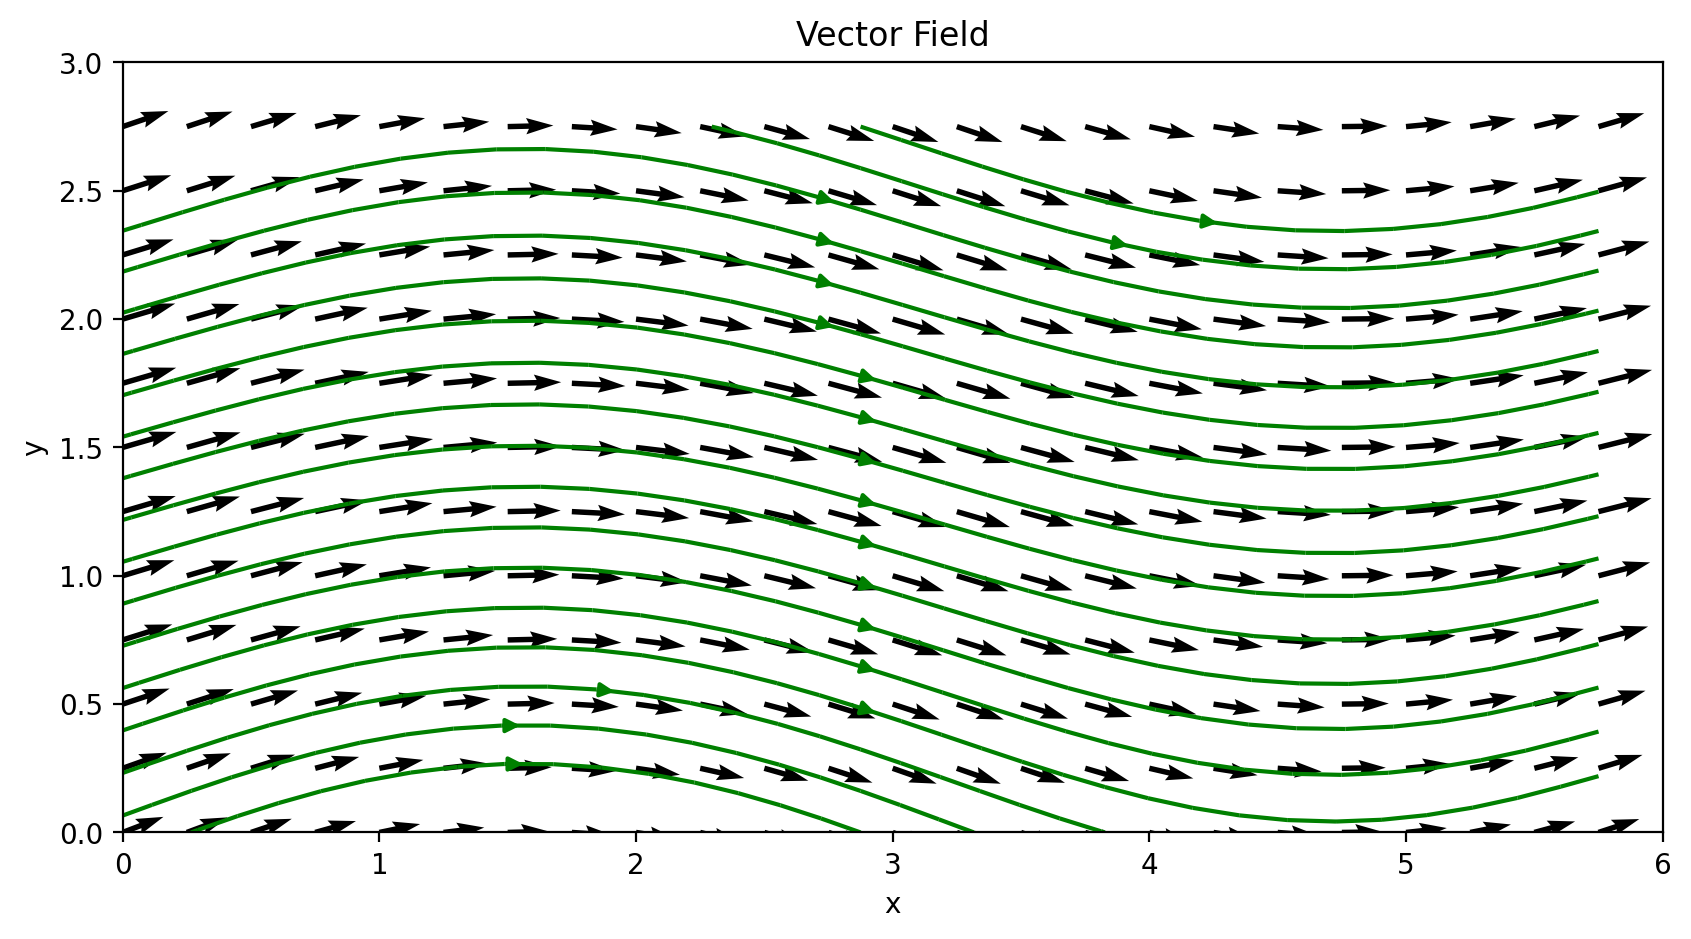

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Generate position vectors
x = np.arange(0, 6, 0.25)
y = np.arange(0, 3, 0.25)

X, Y = np.meshgrid(x, y)

# Velocity components
u = np.sin(Y) + np.pi
v = 1.2*np.cos(X)

# Create a new figure axes
fig, ax = plt.subplots(figsize=(10,5))

# Plot the vector field
ax.quiver(X, Y, u, v)

# Number of streamlines we want to draw
nstream = 18

# Points in (x,y) where the streamlines start (they are then integrated in both directions)
# In this case I take nstream points along from the lowest y value to the highest along 
# the mid point of x. Rather than type actual numbers this method allows the code to work
# with any input should you change x and y
seed_points = np.array([np.linspace(np.median(x), np.median(x),nstream),\
                        np.linspace(np.min(y), np.max(y),nstream)])

# plot the streamlines
ax.streamplot(X, Y, u, v, color='g', start_points=seed_points.T)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Vector Field")
plt.xlim([0, 6])
plt.ylim([0, 3])
ax.set_aspect('equal')
plt.show()

Streamlines, as we have already seen, are simply curves that are everywhere tangent to the vector field for any instance in time. This means that the flow is everywhere following the curvature of the streamline and hence never crosses them. **There is no mass flux normal to a streamline.** The sinusoidal nature of the flow field shown above is now readily apparent by employing streamlines to visualise the flow.

## Streamline orientated coordinate system

Let us now consider a new coordinate system, $(s,n)$, mapped to the curvature of the streamlines. The position of any particle and its velocity in a steady flow can described in terms of its position along a streamline $s$ and its position normal to that streamline $n$. 
Unlike our simple Cartesian coordinate system this new $(s,n)$ system can be curvilinear but don't worry, it's much the same.

The figure below shows the green streamlines from the previous figure as well as the curves normal to them, shown in red. As above the flow is still confined to the streamlines with no velocity normal along the red lines. Notice how as the green streamlines curve upwards the red normal curves fan outwards.

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/s_n.png" width="800" />
<center>The s-n coordinate system for the velocity field defined above</center>

Lets try to recreate this image with Python and `matplotlib`.

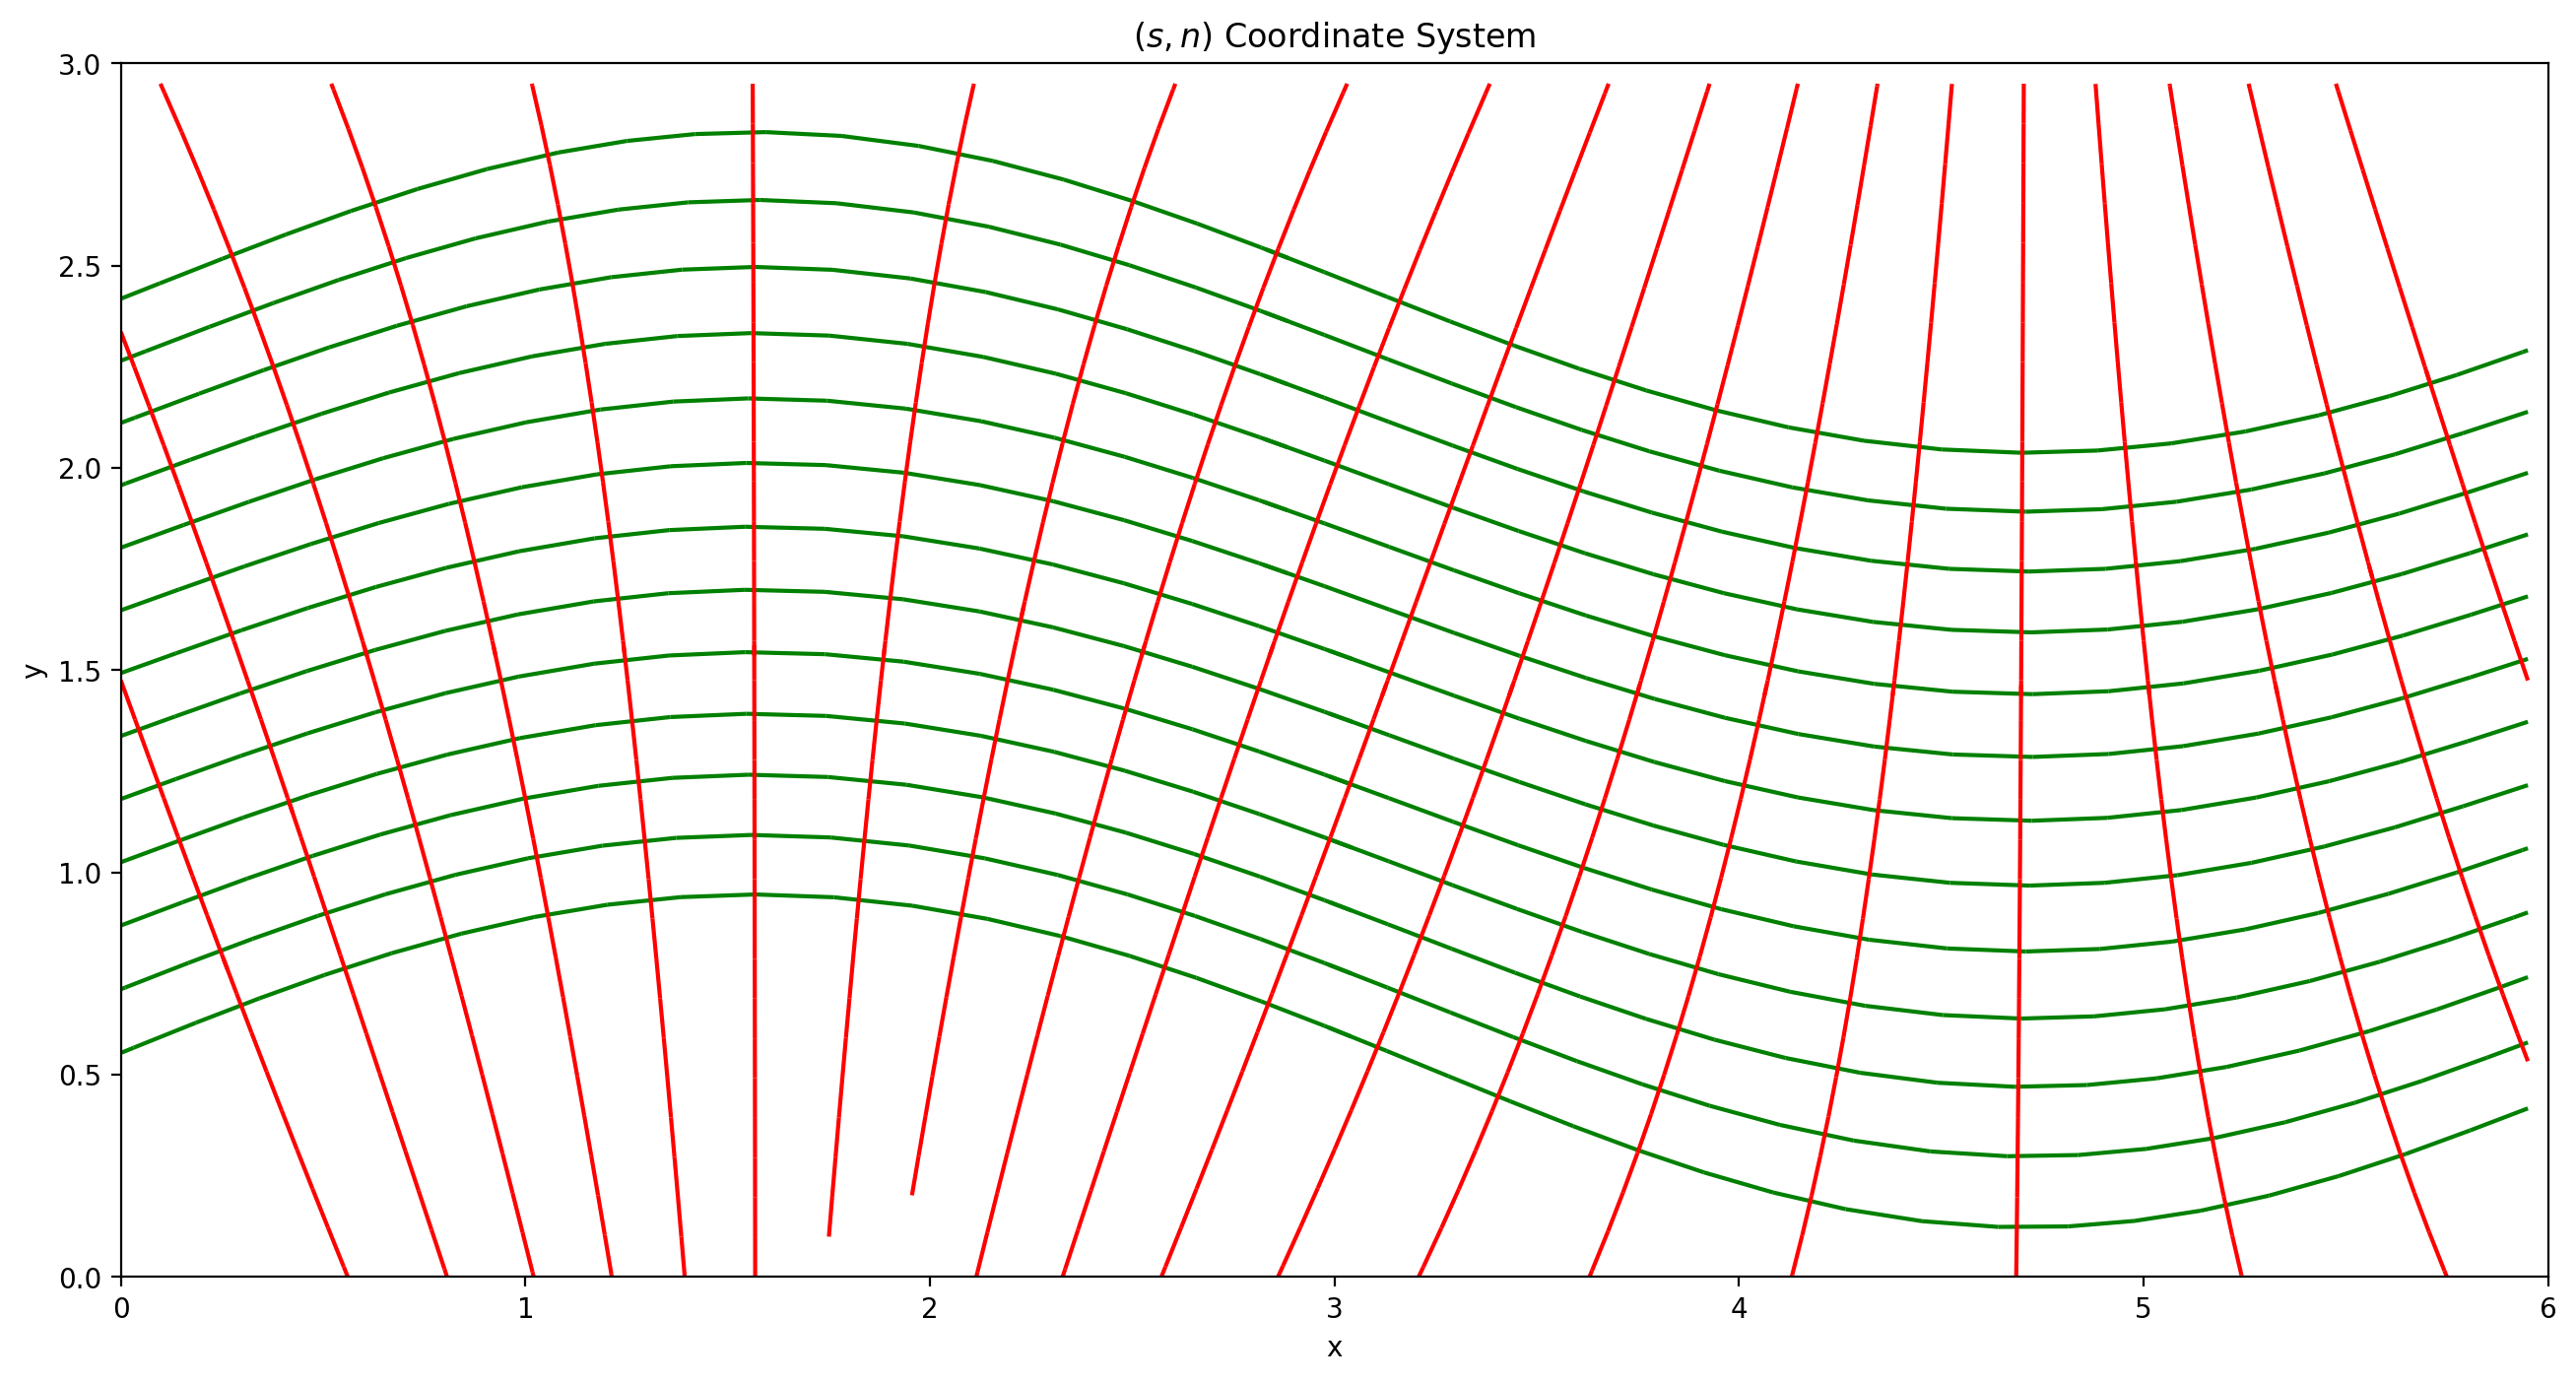

In [2]:
# recreate our position vector grid
x = np.arange(0, 6, 0.05)
y = np.arange(0, 3, 0.05)

X, Y = np.meshgrid(x, y)

# components of velocity field
u = np.sin(Y) + np.pi
v = 1.5*np.cos(X)

# Create a new figure axes
fig, ax = plt.subplots(figsize=(16,8))

# Plot the vector field
# ax.quiver(X, Y, u, v)

# We can make this easy by plotting our green streamlines and 
# then plotting red streamlines by flipping the velocity components
# This is a simple inplementation of a 'rotation matrix'

# Becasue we want to define starting points for both sets of streamlines
# we can define a function that we can call upon as needed
# Its good practise to avoid repeating code

def gen_seeds(x,y,nstream):
    seed_points = np.array([np.linspace(np.median(x), np.median(x),nstream),\
                  np.linspace(np.min(y), np.max(y),nstream)])
    return seed_points
    
# As above we want to seed our streamlines evenly from top to bottom from the midpoint in x
# our function gen_seeds is designed to do this
seed_points = gen_seeds(x,y,20)

# ax.plot(seed_points[0],seed_points[1],'go')
ax.streamplot(X, Y, u, v,color='green',start_points=seed_points.T, minlength = 1, arrowstyle='-')

# For the red streamlines we need to seed from left to right about the midpoint in y
# so we feed it (y,x) instead of (x,y) and then flip the result back to (x,y)
seed_points = np.flipud(gen_seeds(y,x,20))

# ax.plot(seed_points[0],seed_points[1],'ro')
ax.streamplot(X, Y, v, -u,color='red',start_points=seed_points.T, minlength = 0.5, arrowstyle='-')

plt.xlabel("x")
plt.ylabel("y")
plt.title("$(s,n)$ Coordinate System")
plt.xlim([0, 6])
plt.ylim([0, 3])
ax.set_aspect('equal')
plt.show()




As with the basis vectors $\mathbf{\hat{{}i}}$ and $\mathbf{\hat{{}j}}$ for the Cartesian system above (and $\mathbf{\hat{{}k}}$ for $\mathbb{R}^3$) we can define basis vectors $\mathbf{\hat{{}s}}$ and $\mathbf{\hat{{}n}}$ for this new coordinate system. A closeup view of the coordinate system is shown below. The local values of the $s$ and $n$ axes are shown as well as the $\mathbf{\hat{{}s}}$ and $\mathbf{\hat{{}n}}$ unit basis vectors for a particle traveling long the $n=0$ streamline between locations $s_1$ and $s_2$. Be careful not to confuse the basis vector $\mathbf{\hat{{}s}}$ with distance $s$.

**To reiterate, the velocity vector $\vec{{}V}$ is always tangent to the streamline.**

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/s_n_zoom.png" width="800" />
<center>Detailed view of the s-n coordinate system</center>


In streamline coordinates we can write the velocity vector in terms of these normal and tangent unit vectors:

\begin{align}
\vec{{}V} = V \mathbf{\hat{{}s}} + 0 \mathbf{\hat{{}n}} = V \mathbf{\hat{{}s}}.
\end{align}

The velocity of the particle along streamline $s$ is $V$ while the velocity normal along $n$ is zero. For steady flow both flow speed $V = V(s,n)$ and direction $\mathbf{\hat{{}s}} = \mathbf{\hat{{}s}}(s,n)$ are functions of location.

The motion of the fluid particles is governed by Newton's second law, $F=m\vec{{}a}$ and relates the influence of pressure, a force per unit area on fluid motion. The mass of our fluid particle is captured by its density $\rho$, the mass per unit volume. The components of the acceleration vector $\vec{{}a}$ can be written in terms of the $\mathbf{\hat{{}s}}$ and $\mathbf{\hat{{}n}}$ basis vectors using the **material derivative**:

\begin{align}
\vec{{}a} = \frac{D\vec{{}V}}{Dt} = a_s \mathbf{\hat{{}s}} + a_n \mathbf{\hat{{}n}}.
\end{align}

There is an additional Jupyter Notebook covering the Material Derivative in some detail.

The acceleration is then obtained by observing that the value of $s$ changes as we move along a streamline and the value of $n$ remains constant and using the chain rule:

\begin{align}
\vec{{}a} =  \frac{D\left(V \mathbf{\hat{{}s}}\right)}{Dt} = \frac{DV}{Dt}\mathbf{\hat{{}s}} + V \frac{D \mathbf{\hat{{}s}}}{Dt}.
\end{align}

and can be expanded for a steady flow:
\begin{align}
\vec{{}a} = \left( \frac{\partial V}{\partial s} \frac{ds}{dt} + \frac{\partial V}{\partial n} \frac{dn}{dt} \right)\mathbf{\hat{{}s}} + V \left( \frac{\partial \mathbf{\hat{{}s}}}{\partial s} \frac{ds}{dt} + \frac{\partial \mathbf{\hat{{}s}}}{\partial n} \frac{dn}{dt} \right).
\end{align}

Since $\frac{ds}{dt} = V$ and $\frac{dn}{dt} = 0$  because the fluid particles always move along the streamline and not normal to it, the previous equation reduces to:

\begin{align}
\vec{{}a} = \left(V \frac{\partial V}{\partial s}  \right)\mathbf{\hat{{}s}} + V \left(V \frac{\partial \mathbf{\hat{{}s}}}{\partial s} \right).
\end{align}

<div class="alert alert-block alert-info">
Therefore the acceleration along a streamline is given by:
\begin{align}
a_s = V  \frac{\partial V}{\partial s}.
\end{align}
</div>

Next we need to consider acceleration normal to the streamline, $a_n$. The effects of curvature on the flow will mean that $a_n$ may not be zero even though the velocity normal to the streamline is zero. This should make intuitive sense, you will experience lateral g-forces as you travel in a car going around a bend.

The figure below shows a fluid particle traveling distance $\delta s$ from point $A$ to $B$ along a curved streamline. The basis vectors $\mathbf{\hat{{}s}}$ and $\mathbf{\hat{{}n}}$ are shown positioned at point $A$ and again at point $B$ corresponding to a displacement $\mathbf{\hat{{}s}}(s+\delta s)$ along the streamline. The quantity $ \frac{\partial \mathbf{\hat{{}s}} }{\partial s}$ above represents the limit as $\delta s \rightarrow 0$ of the change in the unit vector orientation along the streamline, $\delta \mathbf{\hat{{}s}}$, per change along the streamline, $\delta s$. The basis vector $\mathbf{\hat{{}s}}$ is a unit vector so its magnitude is constant ($|\mathbf{\hat{{}s}}| = 1$) but its orientation along a curved streamline will change.

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/vector.png" width="400" />
<center>Analysis of normal acceleration on a curved streamline for a fluid particle moving a distance $\delta s$ from point $A$ to point $B$. Shown also is a velocity triangle showing change in orientation of the unit vector $\mathbf{\hat{{}s}}$ and the resultant vector $\mathbf{\hat{{}s}}(s+\delta s)$ due to the change $\delta\mathbf{\hat{{}s}}$.</center>


We can analyse this motion by considering the velocity triangle shown in the previous figure. The orientation of the velocity vector of the particle as it moves from point $A$ to $B$ changes from $\mathbf{\hat{{}s}}(s)$ to $\mathbf{\hat{{}s}}(s+\delta s)$ therefore the vector $\delta\mathbf{\hat{{}s}}$ represents the change in the orientation of the velocity vector. 

We can write an expression for $\delta\mathbf{\hat{{}s}}$ as:

\begin{align}
\delta\mathbf{\hat{{}s}} &= \mathbf{\hat{{}s}}(s+\delta s) - \mathbf{\hat{{}s}} \\
&= \mathbf{\hat{{}s}} + \frac{\partial\mathbf{\hat{{}s}}}{\partial s}\delta s - \mathbf{\hat{{}s}} \\
&= \frac{\partial\mathbf{\hat{{}s}}}{\partial s}\delta s.
\end{align}
"

Both triangles $AOB$ and $A'OB'$ shown in the last figure are similar triangles.
 As $\delta s \rightarrow 0 \Rightarrow \delta\theta \rightarrow 0$, and  $\delta\mathbf{\hat{{}s}}$ becomes increasingly normal to the streamline, i.e. along $n$. Small angle theory gives 
 
 $\sin{\delta\theta} = \delta\theta$, 
 
\begin{align}
\delta\mathbf{\hat{{}s}} &= |\mathbf{\hat{{s}}}|\sin\delta\theta \mathbf{\hat{{n}}} \\
&= |\mathbf{\hat{{s}}}|\delta\theta \mathbf{\hat{{n}}} \\
&= \delta\theta \mathbf{\hat{{}n}}
\end{align}

since $|\hat{{}s}|=1$

Therefore:
 
\begin{align}
\frac{\partial \mathbf{\hat{{}s}}}{\partial s} = \lim_{\delta s \rightarrow 0} \frac{\delta \mathbf{\hat{s}}}{\delta s} = \frac{\delta\theta}{\delta s}\mathbf{\hat{{}n}}.
\label{ds}
\end{align}

As $\delta s = \mathbf{R}_c \delta\theta$, this becomes 

\begin{align}
\frac{\partial \mathbf{\hat{{}s}}}{\partial s}  = \frac{\mathbf{\hat{{}n}}}{\mathbf{R}_c}
\end{align}

the acceleration can now be written:

\begin{align}
\vec{a} = V\frac{\partial V}{\partial s}\mathbf{\hat{{}s}} + \frac{V^2}{{\mathbf{R}}_c}\mathbf{\hat{{}n}},
\end{align}

or in terms of streamwise and normal components:


<div class="alert alert-block alert-info">
\begin{align}
a_s = V\frac{\partial V}{\partial s},~a_n = \frac{V^2}{{\mathbf{R}}_c}
\end{align}
</div>

## Bernoulli's Equation

Thus far we have considered the motion of a fluid particle along a streamline and derived expressions for the acceleration of the particle along and normal to the flow direction. As previously noted Newton's second law, $F=m\vec{a}$, governs fluid motion. Having already considered acceleration we now turn our attention to the forces acting on the fluid element. These comprise the pressure forces and the gravitational forces and are illustrated below for a fluid particle of volume $\delta { \rlap{V}-} = \delta s\delta n \delta y$ and mass $\delta m$.

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/Bernoulli.png" width="800" />
<center>Analysis of forces acting on fluid particle. The terms $p$ and ${ \rlap{V}-}$ are the pressure of the particle and its volume. The top row shows the volume of the fluid particle, the areas where the streamwise and normal pressures are exerted and the decomposition of the gravitational forces into streamwise and normal components.</center>


The sum of the forces in the streamwise direction is

\begin{equation}
\sum \delta F_s = \delta m~a_s = \delta mV \frac{\partial V}{\partial s} = \rho \delta { \rlap{V}-}~V\frac{\partial V}{\partial s}
\label{motion}\tag{1}
\end{equation}

The gravitational force (particle weight) acting in the streamwise direction:

\begin{equation*}
\delta W_s = -\delta W \sin{\theta} =-\gamma \delta { \rlap{V}-}\sin{\theta}
\end{equation*}

where $\gamma = \rho g$ is the specific weight of the fluid.

The pressure force acting in the streamwise direction:

\begin{equation*}
\delta F_{ps} = (p-\delta p_s)\delta n\delta y - (p+\delta p_s)\delta n\delta y = -2 \delta p_s \delta n\delta y.
\end{equation*}

Since:

\begin{equation*}
\delta p_s \approx \frac{\partial p}{\partial s}\frac{\delta s}{2}~\Rightarrow 
\delta F_{ps} = -\frac{\partial p}{\partial s}\delta s\delta n\delta y
=-\frac{\partial p}{\partial s}{\delta \rlap{V}-}
\end{equation*}

Summing the pressure and gravitational forces:

\begin{equation}
\sum \delta F_s = \delta W_s + \delta F_{ps} = \left( -\gamma \sin{\theta}-\frac{\partial p}{\partial s} \right)\delta{ \rlap{V}-}
\label{F_s}\tag{2}
\end{equation}

Equating the RHS of equation \ref{F_s} with the RHS side of equation \ref{motion}, the equation of motion, we get:

\begin{equation*}
-\gamma \sin{\theta}-\frac{\partial p}{\partial s} = \rho V \frac{\partial V}{\partial s}
\end{equation*}

and rearranging:

\begin{equation*}
\frac{\partial p}{\partial s} + \rho V \frac{\partial V}{\partial s} + \gamma \sin{\theta} = 0
\end{equation*}

Using the chain rule, $dp = \frac{\partial p}{\partial s}ds + \frac{\partial p}{\partial n}dn $ and noting that along a streamline $dn = 0$ 

\begin{equation*}
\frac{d p}{d s} = \frac{\partial p}{\partial s}
\end{equation*}

The velocity derivative can be rewritten, using the power rule $\frac{d}{dx}(x^n) = n~x^{n-1}$:
\begin{equation*}
\frac{d}{d s} \left( \frac{V^2}{2} \right) = V\frac{dV}{ds}
\end{equation*}

Additionally $\sin{\theta} = \frac{dz}{ds}$. Combining the above gives Euler's equation:

\begin{equation}
\frac{dp}{ds} + \rho \frac{d}{d s} \left( \frac{V^2}{2} \right) + \gamma \frac{dz}{ds} = 0
\end{equation}

Simplifying:
\begin{equation*}
{dp} + \frac{1}{2}\rho \left( {V^2} \right) + \gamma dz = 0
\end{equation*}

<div class="alert alert-block alert-info">
and integrating yields Bernoulli's first equation along a streamline:
\begin{equation}
p + \frac{1}{2}\rho {V^2} + \gamma z = \text{const}
\end{equation}
</div>


## Bernoulli's Second Equation

Repeating the process normal to the streamline in a similar manner and skipping several steps for brevity; the equation of motion is:

\begin{equation}
\sum \delta F_n = \delta{m}~{a_n} = \delta m \frac{V^2}{\mathbf{R}_c} = \rho \delta { \rlap{V}-} \frac{V^2}{\mathbf{R}_c}
\label{motion2}\tag{3}
\end{equation}

The pressure force in the normal direction is given by:

\begin{equation*}
\delta F_{pn} = (p-\delta p_n)\delta s\delta y - (p+\delta p_n)\delta s\delta y = -2 \delta p_n \delta s\delta y
\end{equation*}

Summing the pressure and gravitational forces normal to the streamline as above:

\begin{equation*}
\sum \delta F_n = \delta W_n + \delta F_{pn} = 
\left( -\gamma \cos{\theta}-\frac{\partial p}{\partial n} \right)\delta{ \rlap{V}-}
\label{Fn}\tag{4}
\end{equation*}

As before, equating the RHS of equations \ref{motion2} and \ref{Fn}:

\begin{equation}
-\gamma \cos{\theta}-\frac{\partial p}{\partial n} = \frac{\rho V^2}{\mathbf{R}_c},
\end{equation}

and rearranging:

\begin{equation*}
\frac{\partial p}{\partial n} +  \frac{\rho V^2}{\mathbf{R}_c} + \gamma \cos{\theta} = 0
\end{equation*}

Using the chain rule once more, $dp = \frac{\partial p}{\partial s}ds + \frac{\partial p}{\partial n}dn $ and noting that along a streamline $dn = 0$ and noting that *normal* to a streamline $ds = 0$ 

\begin{equation*}
\frac{d p}{d n} = \frac{\partial p}{\partial n}
\end{equation*}

Noting that $\cos{\theta} = \frac{dz}{dn}$ and combining the above gives:
\begin{equation}
\frac{dp}{dn} + \frac{\rho V^2}{\mathbf{R}_c}+ \gamma \frac{dz}{dn} = 0
\end{equation}

Simplifying:
\begin{equation*}
{dp} + \frac{\rho {V^2} }{\mathbf{R}_c}dn + \gamma dz = 0
\end{equation*}


<div class="alert alert-block alert-info">
and integrating yields Bernoulli's second equation normal to a streamline:
\begin{equation}
p + \rho \int \frac{V^2}{\mathbf{R}_c} dn + \gamma z = \text{const}
\end{equation}
</div>

## Implications of Bernoulli's Equation

The two Bernoulli equations are valid when computed along and normal to a streamline respectively. 
They assume the flow is steady, inviscid and and incompressible. Nevertheless these equations can let us solve a lot of fluids problems or obtain a first estimate of how a flow will behave before more complex analysis is undertaken.

Looking again at the first Bernoulli equation each term has the units $J/m^3$ or $N/m^2$ or $Pa$.

\begin{equation}
\underbrace{p}_{\text{static pressure}} + 
\underbrace{\frac{1}{2}\rho {V^2}}_{\text{dynamic pressure}} + 
\underbrace{\rho g z}_{\text{hydrostatic pressure}} = 
\underbrace{p_{total}}_{\text{total pressure}}
\end{equation}

The *static pressure* is the pressure of the fluid due to its thermodynamic state. Consider the state equation for an ideal gas $p = \rho R T$. Here the pressure $p$ is the static pressure.

The *dynamic pressure* $\frac{1}{2}\rho {V^2}$ isn't really a pressure at all. Instead it is a measure of the kinetic energy of the flow measured as a force per unit area.

The sum of the *static pressure* and the *dynamic pressure* is referred to as the *stagnation pressure*. This is the pressure felt by when a flow is brought to rest at a point in a streamline. For example at the leading edge of a wing.

The *hydrostatic pressure* we have already covered, but to reiterate this the pressure due to gravitational forces and results from the weight of a column of fluid.

Dividing by $\rho g$ results in

\begin{equation}
\frac{p}{\rho g} + \frac{V^2}{2g} + z = \text{H}
\end{equation}

where $\text{H}$ is the total pressure head which has units of $J/N$ or simply $m$. Expressing pressure in the form of a pressure head has some advantages.

### The relationship between velocity and pressure.

Lets neglect the hydrostatic component for a moment.

\begin{equation}
\underbrace{p}_{\text{static pressure}} + 
\underbrace{\frac{1}{2}\rho {V^2}}_{\text{dynamic pressure}} = 
\underbrace{const}_{\text{stagnation pressure}}
\end{equation}

The JavaScript demo below is designed to maintain a constant amount of energy in the box, this means that the energy is "conserved". Because we are using a simple computer simulation we can do clever things to make this easier to work with. Any particles crossing the left or right boundary are simply teleported to the other side. This is called a periodic boundary condition but was also used in the Asteroids video game from 1979. Fly your spaceship off the edge of the screen and you will appear at the opposite side. This trick is commonly used in sophisticated computer simulations and allows us to consider an infinitely long domain.

If you increase the kinetic energy by moving the slider to apply a force to the particles you will change their velocity ($F = ma$). The colour of the upper and lower walls indicates the average number of particle collisions over a period of 30 animation frames (or 1 second). This is essentially what we described as pressure. Red indicates high pressure and blue low pressure. What happens when you increase the velocity?

In [3]:
from IPython.display import IFrame
IFrame('https://nolankucd.github.io/MEEN20010/media/3.2/bernoulli.html', '100%', '500px')

## Curvature

The second of Bernoulli's equations which relates the pressure normal to a streamline to the velocity of the fluid and the radius of curvature. The smaller $R_c$ is the greater effect we will observe. The larger $\mathbf{R}_c$ to the limit of $\mathbf{R}_c \rightarrow \infty$ the effect will vanish.

### Measuring Static Pressure

A common way to measure the static pressure is with a manometer. If we consider the second Bernoulli equation for the limit as $\mathbf{R}_c \rightarrow \infty$, i.e. parallel flow, 

\begin{align}
\lim_{\mathbf{R}_c \rightarrow \infty} \frac{\rho V^2}{\mathbf{R}_c} = 0
\end{align}

This means that for parallel flows any pressure change normal to the flow is due to hydrostatic changes only.
For many flows, such as in pipes where $z$ is small this means that $\frac{dp}{dn} = 0$. Therefore we can measure the static pressure in a flow by placing a *pressure tap* at the wall. A pressure tap is a small hole positioned normal to the flow direction. We've seen it previously in our discussion of the piezometer.

In a subsequent section we will see that we can measure the pressure drop due to viscous losses this way by measuring the differential pressure at each end of a long pipe. The pressure is balanced with the viscous shear at the wall.

As in the pump lab we can use $\rho g h$ to measure the pressure.

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/pipe.png" width="800" />
<center>Measuring pressure drop in a pipe using a manometer</center>


### Aerodynamic lift

Both equations play a role in how airfoils produce aerodynamic lift. The image below shows an airfoil at a high angle of attack in a wind tunnel. Smoke visualisation is used to reveal the streamlines of the flow field.
We observe the streamlines above the airfoil bunch up closer together. This indicates that the flow is accelerating in this region. This tells us that the pressure tangent to the streamlines is reduced. We can also observe the streamlines exhibit a pronounced curvature. This indicates that the flow moving above and below the airfoil experiences a strong upwards centrifugal force which corresponds to low on the upper surface and higher pressure on the lower surface.

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/airfoil.png" width="600" />
<center>Smoke visualisation of flow over an airfoil shape (Munsen et al)</center>

## Applications of Bernoulli's equation


We've just seen that by reasoning away the effects of curvature we can assume that the pressure field does not change normal to the flow field such as that found in a pipe. Pressure taps are one means to measure pressure. Another is a device called a "Pitot tube".

A Pitot tube is an instrument that measured the stagnation pressure

\begin{equation}
p_{stagnation} = p + \frac{1}{2}\rho {V^2}
\end{equation}

When combined with a static pressure tap we can solve for the dynamic pressure and therefore the flow velocity.

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/pitot.png" width="800" />
<center>Measuring stagnation pressure with a Pitot tube and static pressure with a pressure tap.</center>

We can combine both types of measurement into a single instrument, the Pitot-static tube. In such an instrument there is a central tube for stagnation pressure and the surrounding 

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/pitotstatic.png" width="400" />
<center>The pitot-static tube is a versatile slender instrument for measuring flow velocity..</center>

The 3D model below is from McMaster-Carr's <a href="https://www.mcmaster.com/products/pitot-tubes/air-sensors-6/">catalogue</a>.

In [4]:
from IPython.display import IFrame
IFrame('https://nolankucd.github.io/MEEN20010/media/3.2/pitotstatic.html', '100%', '800px')

## The Continuity Equation

An important equation we will look at in more detail in the next section is the **Continuity Equation**. In the pump lab many of you observed that when the pump is filing from and returning water to the same container there is no change in the fluid level: **"What goes in must come out!".

This equation is given by:

\begin{equation}
\dot{m} = \rho U A
\end{equation}

where $\dot{m}$ is the **mass flow rate** in $kg/s$, $U$ is the average velocity and $A$ the area perpendicular to the flow (so the cross sectional area of a pipe for example).

Since density is usually a constant, unless we are working with high-speed or high-pressure gases, we can simplify this as:

\begin{equation}
Q = U A
\end{equation}

Where $Q$ is the **volumetric flow rate** in $m^3/s$, however units such as $ml/min$ or litres per hour may be more useful.

Thinking of the pump lab you measured the volumetric flow rate in 3.2 and 1.6 internal diameter tubes. Can you calculate the velocity of the water in the tubes?

### Nozzles and diffusers

Consider the flow through a nozzle. A nozzle something you might add to the end of a tube that reduces the cross sectional area $A$. You may have seen a nozzle on a garden hose or elsewhere and noticed that it makes the water velocity higher. 

We can combine Bernoulli's equation with the Continuity equation to solve problems in involving changes in the cross sectional area of flow in pipes. Because we are considering a frictionless inviscid fluid we will ignore effects like flow separation or turbulence — we will get to those later.

Consider the nozzle attached to the tube below.

In [7]:
from IPython.display import IFrame
IFrame('https://nolankucd.github.io/MEEN20010/media/3.2/nozzle.html', '100%', '800px')

If we know the flow rate in the tube then we know the flow rate exiting the nozzle as it must be the same since **what goes in must come out!** We can obtain the average velocity in the tube also since $Q = U A$.

Therefore we can write the continuity equation as:

\begin{equation}
Q = U_1 A_1 = U_2 A_2
\end{equation}

and solve for $U_2$.

The same applies for a diffuser where $A_2 > A_1$. A nozzle will increase the velocity of the flow while a diffuser will decrease it, however the flow rate will remain unchanged.

### An example

Water of density 999 $kg/m^3$ exits from a circular pipe of diameter $50 mm$ through a nozzle with exit area of $20 mm$. The inlet and outlet velocities are $V_1 = 5.1~m/s$ and $V_2 = 31.9~m/s$ so that $V_1 A_1 = V_2 A_2$


Calculate the pressure change across the nozzle.

<img src="media/3.2/nozzle.png" width="800" />
<center>Inviscid flow through a nozzle</center>

We need to determine the pressure differential across the nozzle between $A_1$ and $A_2$.

Rewriting the Bernoulli equation to relate points 1 and 2:

\begin{equation}
    p_1 + \frac{1}{2}\rho {V_1^2} = p_2 + \frac{1}{2}\rho {V_2^2}
\end{equation}

\begin{equation}
    p_2 - p_1 = \frac{1}{2}\rho \left( {V_1^2 - V_2^2} \right)
\end{equation}


\begin{equation}
    \Delta p = \frac{1}{2}\rho \left({5.1^2 - 31.9^2} \right) = -495~kPa
\end{equation}

As the area is reduced and the velocity is increased the pressure is reduced.

If the area $A_2$ were to increase the velocity would be reduced and the pressure would increase. However in reality a diffuser must be carefully designed to avoid flow separation effects.

### Combining the Continuity and Bernoulli Equations

Considering a nozzle or a diffuser where there is a change in cross sectional area, velocity and area we can combine the continuity and Bernoulli equations to relate the volumetric flow rate through our geometry to the pressure change and the area. We can easily measure the pressure using a pressure tap in a known geometry. 

We can write the Bernoulli equation as follows:

\begin{equation}
    p_1 - p_2 = \Delta p = \frac{1}{2}\rho \left( {V_2^2 - V_1^2} \right)
\end{equation}

and similarly for continuity:

\begin{equation}
    V_1 A_1 = V_2 A_2
\end{equation}

so that:

\begin{equation}
    \frac{A_1}{A_2} = \frac{V_2}{V_1}
\end{equation}

Combining the two: 

\begin{equation}
    \Delta p = \frac{1}{2}\rho \left( {V_1^2 \left( \frac{V_2}{V_1}\right)^2 - V_1^2} \right)
\end{equation}

or 

\begin{equation}
    \Delta p = \frac{1}{2}\rho \left( {V_1^2 \left( \frac{A_1}{A_2}\right)^2 - V_1^2} \right)
\end{equation}

Now we will isolate $V_1$:

\begin{equation}
    \Delta p = \frac{1}{2}\rho V_1^2  \left( {\left( \frac{A_1}{A_2}\right)^2 - 1} \right)
\end{equation}


\begin{equation}
    V_1^2 = \frac{2 \Delta p}{\rho \left( {\left( \frac{A_1}{A_2}\right)^2 - 1} \right) }
\end{equation}

Obtaining
\begin{equation}
    V_1 = \sqrt{\dfrac{2 \Delta p}{\rho \left( {\left( \dfrac{A_1}{A_2}\right)^2 - 1} \right) } }
\end{equation}

The flow rate is then:
\begin{equation}
    Q = V_1 A_1 = A_1 A_2 \sqrt{\frac{2 \Delta p}{\rho \left( A_1^2 - A_2^2 \right) }}
\end{equation}

## The Venturi Meter

We can use this new equation to understand another type of device that exploits Bernoulli's equation.
The Venturi meter is a device that is inserted into a length of pipe. It features a gentle contraction that looks like a nozzle and a diffuser joined together. From our simple inviscid frictionless flow perspective this device will locally increase the velocity and reduce the pressure at the throat and thereafter return the flow to the upstream conditions and have no further effect on the flow downstream.

Connecting a manometer between an undisturbed point in the pipe and the throat of the Venturi meter will result in a differential pressure reading due to the change in cross sectional area. Since the flow rate $Q$ is conserved we can easily calculate it.

\begin{equation}
    Q = A_1 A_2 \sqrt{\frac{2 \Delta p}{\rho \left( A_1^2 - A_2^2 \right) }}
\end{equation}

<img src="media/3.2/venturi.png" width="800" />
<center>The Venturi meter</center>

## Orifice Plates

A more compact alternative to the Venturi meter is the orifice plate. This is convenient as the Venturi meter can be quite long to prevent flow separation effects. The orifice plate replaces the gentle geometry of the Venturi meter with an abrupt change in area in the form of a metal plate with a hole. A correction factor (the discharge coefficient $C_d$) is used to account for the complex separated flow pattern that occurs.

\begin{equation}
    Q = C_d A_{orifice} A_{pipe} \sqrt{\frac{2 \Delta p_{orifice}}{\rho \left( A_{pipe}^2 - A_{orifice}^2 \right) }}
\end{equation}

There are a lot of resources on orifice plate flow meters available in text books and on manufacturers websites. You will use such a flow meter in the turbine lab. You should do some background reading on these devices as part of your research for the second lab report.

## Torricelli’s equation


Yet another use of Bernoulli's equation was explored by Torricelli and is related to the siphon you created in the lab. Consider a reservoir. The fluid therein is at rest. The surface is open and exposed to ambient atmospheric pressure. An outflow at some depth $H$ will allow water locally to escape with local velocity $V_2$ at the exit. We can imagine a streamline showing the movement of particles at vanishingly small velocities towards the exit where the velocity increases, perhaps with a nozzle.

<img src="https://nolankucd.github.io/MEEN20010/media/3.2/Torricelli.png" width="800" />
<center>The Torricelli effect</center>

By considering this flow path we can use Bernoulli's equation once more.

\begin{equation}
    \frac{p_1}{\rho g} + \frac{V_1^2}{2g} + z_1 = \frac{p_2}{\rho g} + \frac{V_2^2}{2g} + z_2
\end{equation}

The pressure at the surface and at the exit is atmospheric pressure and cancels.
The velocity $V_1$ is zero. This leaves only $V_2$ and the vertical height as relevant.

\begin{equation}
     z_1 = \frac{V_2^2}{2g} + z_2
\end{equation}


\begin{equation}
    V_2 = \sqrt{2g \left (z_1 - z_2 \right )}
\end{equation}


\begin{equation}
    V_2 = \sqrt{2gH}
\end{equation}

This animation shows how $V_2$ is a function of $H$.

<video loop controls src="https://nolankucd.github.io/MEEN20010/media/3.2/Torricellis_law.mp4" width="800" />

## Finishing up

The following video covers much of the same material covered within this notebook.
Many of the visualisations are excellent. Here is a link to the video or you can watch it embedded by running the cell below.

https://www.youtube.com/watch?v=LI9Mi1KhFTs&list=PL0EC6527BE871ABA3&index=6&feature=plpp_video

In [1]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/watch?v=LI9Mi1KhFTs', '100%', '600px')


# References

1. Munson, B.R., Young, D.F., Okiishi, T.H. and Huebsch, W.W., 2010. *"Fundamentals of Fluid Mechanics"*. Singapore: Wiley.